In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics

In [11]:
df=pd.read_csv('BankChurners.csv',usecols=list(range(0, 21)))

In [12]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [13]:
df.shape

(10127, 21)

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,"10,127.00","739,177,606.33","36,903,783.45","708,082,083.00","713,036,770.50","717,926,358.00","773,143,533.00","828,343,083.00"
Customer_Age,"10,127.00",46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,"10,127.00",2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,"10,127.00",35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,"10,127.00",3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,"10,127.00",2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,"10,127.00",2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,"10,127.00","8,631.95","9,088.78","1,438.30","2,555.00","4,549.00","11,067.50","34,516.00"
Total_Revolving_Bal,"10,127.00","1,162.81",814.99,0.00,359.00,"1,276.00","1,784.00","2,517.00"
Avg_Open_To_Buy,"10,127.00","7,469.14","9,090.69",3.00,"1,324.50","3,474.00","9,859.00","34,516.00"


In [16]:
df.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [17]:
cat_cols=df.describe(include='O').columns

In [18]:
for i in cat_cols:
    print(df[i].value_counts())
    print('#######################')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
#######################
Gender
F    5358
M    4769
Name: count, dtype: int64
#######################
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
#######################
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
#######################
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
#######################
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
#######################


- Majority of the customers are existing customers.
- Attrition_Flag data is imbalanced with only 1627 Attrited customers against 8500 Existing customers.
- Most of the customers are Female.
- Customers are predominantly Graduates.
- Majority of the customers are married.
- Annual income of the majority of the customers is less than $40K.
- There are 1112 records under Income_Category labelled as 'unknown' which possibly be considered as missing entries.
- Most of the customers hold a 'Blue' category card and only 20 of the customers hold a 'Platinum' category card.

In [19]:
def display_null_count(df):
    """
    Function to display the count and proportion of missing records in each attribute.
    """
    for attr in df.columns:
        print('-'*50)
        print(f'{attr}')
        print('-'*50)
        print('Null entry count:', df[attr].isnull().sum())
        print('Null entry proportion:', round(100 * df[attr].isnull().sum() / df.shape[0], 2), '%\n')

In [20]:
def get_outliers(series):
    """
    Function to list all the outliers in a series.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR
    
    return series[(series < lw) | (series > uw)]

In [21]:
def univariate_plots(df):
    """
    Plot histogram and box plots for continuos attributes and count plots for categorical attributes in a dataset.
    """
    n_rows = int(np.ceil(df.shape[1]/2))
    figure = plt.figure(figsize=(16, 8*n_rows))
    sub_figures = figure.subfigures(n_rows, 2)
    for i, attr in enumerate(df.columns):
        fig = sub_figures[int(i/2)][i%2]
        fig.suptitle(attr, y=0.94, fontsize='x-large', fontweight='bold')
        if df[attr].nunique() > 10 and pd.api.types.is_numeric_dtype(df[attr]):
            ax_box, ax_hist = fig.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)})
            box_plot = sns.boxplot(df, x=attr, ax=ax_box, showmeans=True, color="yellow")
            box_plot.set(xlabel=None)
            sns.histplot(df, x=attr, kde=True, ax=ax_hist)
            ax_hist.axvline(df[attr].mean(), color="green", linestyle="--")
            ax_hist.axvline(df[attr].median(), color="black", linestyle="--")
        else:
            ax_count = fig.subplots(nrows=1)
            count_plot = sns.countplot(df, x=attr, ax=ax_count)
            for bars in count_plot.containers:
                for j, p in enumerate(bars):
                    count_plot.annotate(
                        f'{(100 * p.get_height() / df.shape[0]) :.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', 
                        va='bottom'
                    )


In [22]:
def get_classification_report(actuals, predictions, labels):
    """
    Function to generate classification report and confusion matrix.
    """
    print('Classification report')
    print('`'*50)
    print(metrics.classification_report(actuals, predictions, labels=labels))

    cm = metrics.confusion_matrix(actuals, predictions, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual');

In [23]:
def evaluate_models(models, xtrain, ytrain, xtest, ytest, cv=None, cv_scorer=None):
    """
    Function to train a list of models and generate performance reports.
    """
    model_scores = list()    
    for model in models:
        model.fit(xtrain, ytrain)
        
        cr = metrics.classification_report(ytest, model.predict(xtest), labels=ytrain.unique(), output_dict=True)
        scores = {
            'model': model.__class__.__name__,
            'accuracy': cr['accuracy'],
            'precision': cr['macro avg']['precision'],
            'recall': cr['macro avg']['recall'],
            'f1_score': cr['macro avg']['f1-score'],
        }
        
        if cv:
            cv_score = cross_val_score(model, xtest, ytest, cv=cv, scoring=cv_scorer)
            scores.update({
                'cv_mean': cv_score.mean(),
                'cv_std': cv_score.std()
            })
        
        model_scores.append(scores)
    
    return pd.DataFrame(model_scores)


In [24]:
def get_best_estimator(x, y, estimator, param_distributions, scoring=None):
    """
    Function to return the best estimator using Randomized Search CV.
    """
    rcv = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions, 
        scoring=scoring,
        random_state=1,
        n_iter=50,
        n_jobs=6,
        verbose=10
    )
    rcv.fit(x, y)
    print('Best score:', rcv.best_score_)
    print('Best parameters:', rcv.best_params_)
    
    return rcv.best_estimator_

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [26]:
df.duplicated().sum()

0

- CLIENTNUM: Client number is a unique identifier and does not convey any information on customer behavior.
- Customer_Age: The customers in the dataset are in the age group of 26 to 73 with about 75% of the customers less than or equal to 52 years old.
- Dependent_count: Average number of dependents is 2 with a maximum of 5 dependents for a customer.
- Months_on_book: The customers have been associated with the bank for atleast 13 months and about 25% of them for more than 40 months.
- Total_Relationship_Count: The number of banking products held by the customers range between 1 and 6 with about 50% of the customers using atleast 4 products.
- Months_Inactive_12_mon: On an average, in the past 12 months, customers have been inactive for about 2 months with 25% of the customers inactive for more than 3 months and upto 6 months. It could provide us with information on whether high inactivity can lead to churning by the customers.
- Contacts_Count_12_mon: On an average, customers have interacted with the bank only twice in the past 12 months and a maximum of 6 times.
- Credit_Limit: The credit limit set for the customers averages at 8632 units with only 25% of the customers enjoying more than 11068 units of credit limit upto a maximum of 34516 units.
- Total_Revolving_Bal: The revolving balance carried by the customers range between 0 to 2517 averaging at 1163.
- Avg_Open_To_Buy: Average amount of unused credit of the customers over the past 12 months has a large variation ranging between 3 to 34516 with a mean of 7469.
- Total_Amt_Chng_Q4_Q1: Expenditure of about 75% of the customers has decreased in Q4 compared to their expenditure in Q1. A maximum of 3.4 times increase in expenditure observed in Q4 over Q1.
- Total_Trans_Amt: The total transaction amount in the past 12 months varies over a wide range between 510 and 18484 with an average of 4404. About 75% of the customers have spent less than 4742.
- Total_Trans_Ct: On an average, in the past 12 months, about 65 transactions are made by the customers ranging between as low as 10 and upto 139.
- Total_Ct_Chng_Q4_Q1: In case of about 75% of the customers, the number of transactions have decreased in Q4 compared to Q1.
- Avg_Utilization_Ratio: On an average, customers have utilized about 27.5% of their credit limit with about 25% of them utilizing atmost of 2.3% and about 75% of them utilizing atmost of 50.3% of their credit limit.

In [27]:
df['Income_Category'].replace('Unknown', np.nan, inplace=True)
df['Marital_Status'].replace('Unknown', np.nan, inplace=True)
df['Education_Level'].replace('Unknown', np.nan, inplace=True)

In [28]:
display_null_count(df)

--------------------------------------------------
CLIENTNUM
--------------------------------------------------
Null entry count: 0
Null entry proportion: 0.0 %

--------------------------------------------------
Attrition_Flag
--------------------------------------------------
Null entry count: 0
Null entry proportion: 0.0 %

--------------------------------------------------
Customer_Age
--------------------------------------------------
Null entry count: 0
Null entry proportion: 0.0 %

--------------------------------------------------
Gender
--------------------------------------------------
Null entry count: 0
Null entry proportion: 0.0 %

--------------------------------------------------
Dependent_count
--------------------------------------------------
Null entry count: 0
Null entry proportion: 0.0 %

--------------------------------------------------
Education_Level
--------------------------------------------------
Null entry count: 1519
Null entry proportion: 15.0 %

-------

### Data Pre-processing

In [29]:
df.drop('CLIENTNUM', axis=1, inplace=True)

In [30]:
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Exploratory Data Analysis

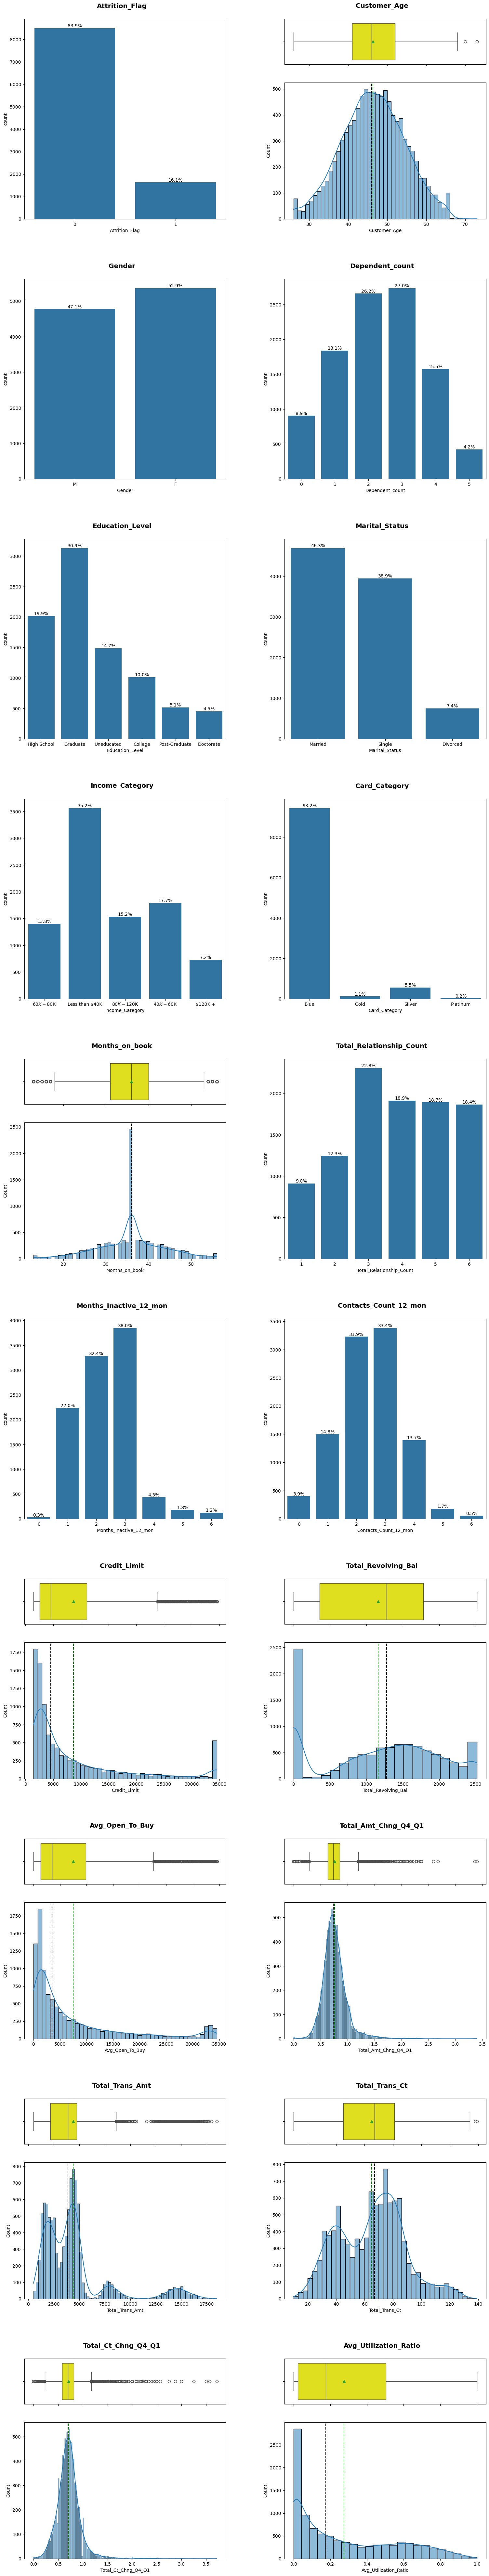

In [32]:
univariate_plots(df)

- Attrition_Flag data is imbalanced with about 84% of records being that of existing customers and only 16% of the records representing attrited customers.
- Customer_Age data is normally distributed with a few data points represented as outliers.
- Gender data distribution is not quite but close to a uniform distribution with majority of the records representing female customers.
- Dependent_count vary between 0 to 5 with majority of the customers having 2 or 3 dependents.
- Most of the customers, about 31% of them, are graduates.
- Number of customers who are married and number of customers who either are single or divorced, is almost the same.
- Majority of about 35.2% of the customers fall under the low Income_Category, earning less than 40k anually.
- 'Blue' category cards seems to be the most popular among the customers with about 93.2% of them using it.
- Months_on_book data has a few outliers with most of the customers having been associated with the bank for about 3 years.
- Majority of about 22.8% of the customers use 3 of the bank's products. The number of customers using 4, 5 and 6 products is approximately the same.
- Only 0.3% of the customers were active throughout the year and about 7.3% of the customers were inactive for more than 3 months.
- About 16% of the customers contacted the bank for more 3 times in the past year.
- Credit_Limit data is sharply right skewed with many data points indicated as outliers. Very few customers have been given a credit limit of more than 10k.
- Most of the customers have a timely payment record with 0 revolving balance.
- Avg_Open_To_Buy data is right skewed with many outliers. Majority of the customers seem to utilize most of their credit limit.
- Total_Amt_Chng_Q4_Q1 data appears to be normally distributed until to an extent but is then right skewed with many outliers. Expenditure in Q4 over that in Q1 has decreased for most of the customers.
- Total_Trans_Amt data distribution is right skewed with records of more than 9k in the amount of transaction considered as outliers.
- Total_Trans_Ct data distribution has two peaks with few outliers.
- Total_Ct_Chng_Q4_Q1 data appears to be normally distributed until to an extent but is then right skewed with many outliers. In case of most of the customers, the number of transactions made has decresed in Q4 over that in Q1.
- Avg_Utilization_Ratio data is right skewed with most of the customers not utilizing their credit limit effectively.

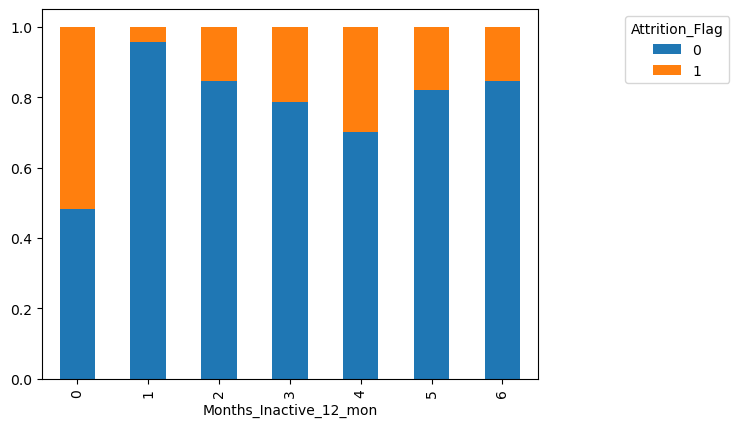

In [33]:
pd.crosstab(df['Months_Inactive_12_mon'], df['Attrition_Flag'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='Attrition_Flag', loc="upper right", bbox_to_anchor=(1.4, 1));

- Aboout 50% of the customers who were active throughout the past year have attrited.
- There is increase in the attrition rate with increase in the number of months of inactivity from 1 through 4, but then there is a decrease in the attrition rate with customers who were inactive for 5 or 6 months in the past year.

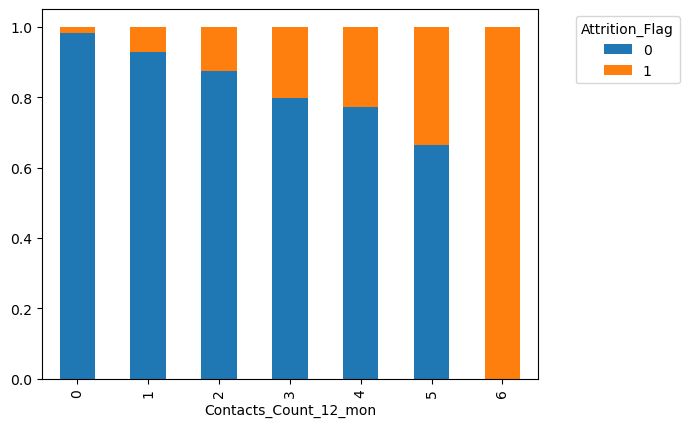

In [34]:
pd.crosstab(df['Contacts_Count_12_mon'], df['Attrition_Flag'], normalize='index').plot(kind='bar', stacked=True)
plt.legend(title='Attrition_Flag', loc="upper right", bbox_to_anchor=(1.3, 1));

- There is a continuos increase in the rate of attrition with increase in the number of times the customers have contacted the bank in the past year. All of the customers who have contacted the bank 6 times in the past year have attrited.
- There might be a need for improvement in the quality of customer support provided by the bank.

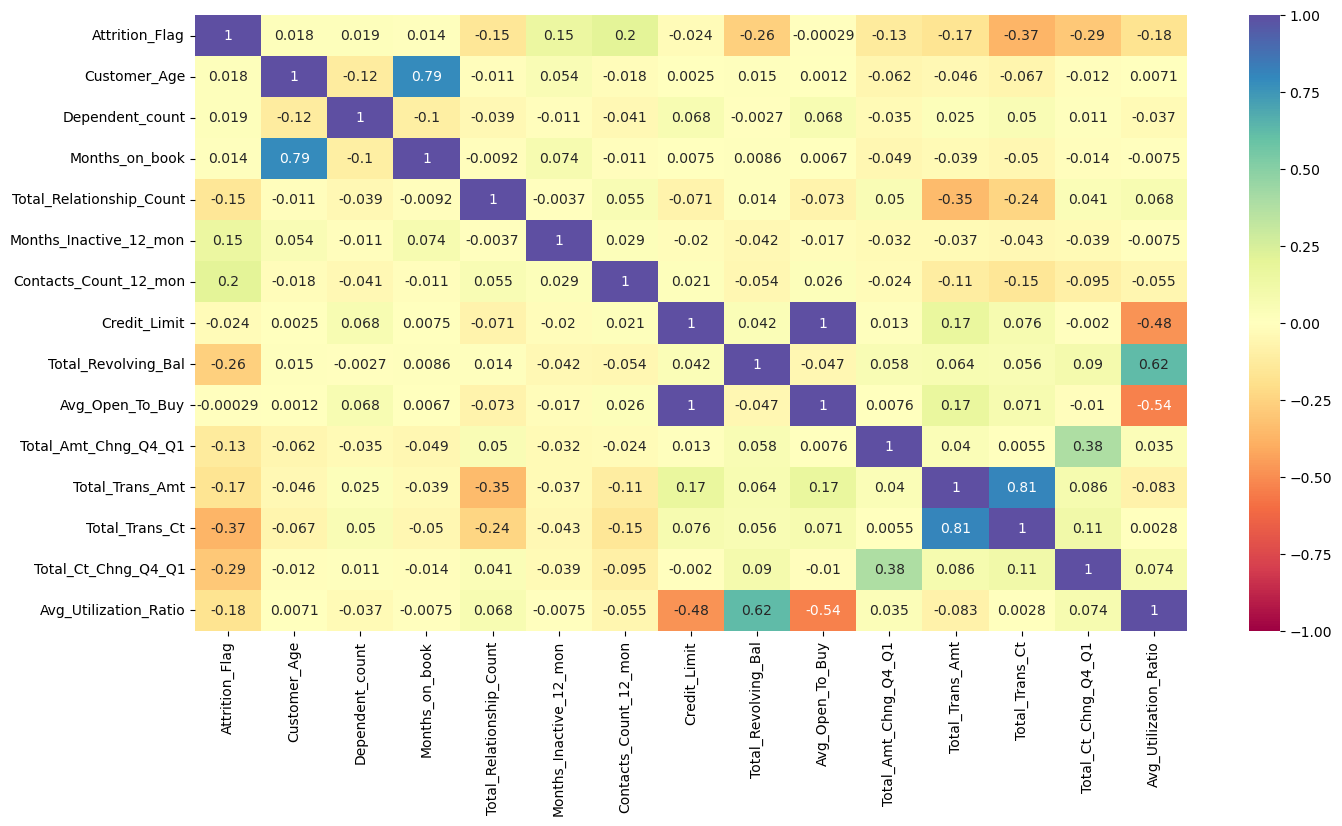

In [35]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral");

- Attrition_Flag appears to have a weak negative correlation with the Total_Trans_Ct indicating that to a small extent, decrease in the number of transactions can hint towards a greater likelihood of attrition.
- Months_on_book has a strong positive correlation with the Customer_Age. Greater the age of a customer, longer is the customer's association with the bank.
- Total_Relationship_Count has a weak negative correlation with the Total_Trans_Amt and Total_Amt_Chng_Q4_Q1 has a weak positive correlation with the Total_Ct_Chng_Q4_Q1.
- Avg_Utilization_Ratio has a negative correlation with the attributes Credit_Limit and Avg_Open_To_Buy which is expected from its definition although the degree of correlation is not very high.
- Avg_Utilization_Ratio also has a positive correlation with the Total_Revolving_Bal indicating that the customers who are on-time with their payments are more likely to effectively utilize their credit limit.

<Axes: xlabel='Customer_Age', ylabel='Avg_Utilization_Ratio'>

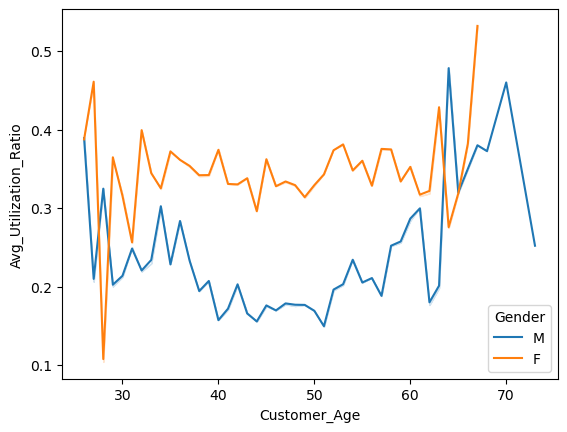

In [36]:
sns.lineplot(df, x='Customer_Age', y='Avg_Utilization_Ratio', hue='Gender', ci=0)

- Credit utilization is higher in female customers than in male customers in the age group of 30 to 60.
- There is a steep increase in the utilization by male customers over the age of 60 whereas a steep decrease in the utitlization by female customers under the age of 30.
- Male customers of the age between 40 to 50 have a decreased credit utilization.

### Data Preparation

In [37]:
print('Percentage of Outliers')
print('`'*50)
for attr in df.select_dtypes(include=['int', 'float']):
    print(f'{attr}: {round(100 * get_outliers(df[attr]).shape[0] / df[attr].notnull().sum(), 2)}%')

Percentage of Outliers
``````````````````````````````````````````````````
Attrition_Flag: 16.07%
Customer_Age: 0.02%
Dependent_count: 0.0%
Months_on_book: 3.81%
Total_Relationship_Count: 0.0%
Months_Inactive_12_mon: 3.27%
Contacts_Count_12_mon: 6.21%
Credit_Limit: 9.72%
Total_Revolving_Bal: 0.0%
Avg_Open_To_Buy: 9.51%
Total_Amt_Chng_Q4_Q1: 3.91%
Total_Trans_Amt: 8.85%
Total_Trans_Ct: 0.02%
Total_Ct_Chng_Q4_Q1: 3.89%
Avg_Utilization_Ratio: 0.0%


- There are outliers present prominantly in the attributes Total_Ct_Chng_Q4_Q1, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Avg_Open_To_Buy and Credit_Limit.
- The entries represented as outliers in the dataset are credible in real case scenarios and hence, they are not being treated.

In [38]:
X = df.drop(["Attrition_Flag"], axis=1)
Y = df["Attrition_Flag"]

X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00
3,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00


In [41]:
x_temp, x_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

x_temp.shape

(8101, 19)

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(f'Proportion of train data: {round(100 * x_train.shape[0] / X.shape[0], 2)}%')
print(f'Proportion of validation data: {round(100 * x_val.shape[0] / X.shape[0], 2)}%')
print(f'Proportion of test data: {round(100 * x_test.shape[0] / X.shape[0], 2)}%')
print('-'*50)
print('\nClass wise distribution of train data:')
print(y_train.value_counts(normalize=True) * 100)
print('-'*50)
print('\nClass wise distribution of validation data:')
print(y_val.value_counts(normalize=True) * 100)
print('-'*50)
print('\nClass wise distribution of test data:')
print(y_test.value_counts(normalize=True) * 100)

Proportion of train data: 59.99%
Proportion of validation data: 20.01%
Proportion of test data: 20.01%
--------------------------------------------------

Class wise distribution of train data:
Attrition_Flag
0   83.93
1   16.07
Name: proportion, dtype: float64
--------------------------------------------------

Class wise distribution of validation data:
Attrition_Flag
0   83.91
1   16.09
Name: proportion, dtype: float64
--------------------------------------------------

Class wise distribution of test data:
Attrition_Flag
0   83.96
1   16.04
Name: proportion, dtype: float64


In [43]:
missing_entries_attrs = [attr for attr in df.columns if df[attr].isna().any()]

In [44]:
missing_entries_attrs

['Education_Level', 'Marital_Status', 'Income_Category']

In [45]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(x_train[missing_entries_attrs])

SimpleImputer(strategy='most_frequent')

In [46]:
# Imputation on x_train
x_train[missing_entries_attrs] = imputer.transform(x_train[missing_entries_attrs])
print(f'Number of missing records in x_train: {x_train.isna().sum().sum()}')

# Imputation on x_val
x_val[missing_entries_attrs] = imputer.transform(x_val[missing_entries_attrs])
print(f'Number of missing records in x_val: {x_val.isna().sum().sum()}')

# Imputation on x_test
x_test[missing_entries_attrs] = imputer.transform(x_test[missing_entries_attrs])
print(f'Number of missing records in x_test: {x_test.isna().sum().sum()}')

Number of missing records in x_train: 0
Number of missing records in x_val: 0
Number of missing records in x_test: 0


In [47]:
# One-hot encoding on x_train categorical attributes
x_train = pd.get_dummies(x_train, drop_first=True)

# One-hot encoding on x_val categorical attributes
x_val = pd.get_dummies(x_val, drop_first=True)

# One-hot encoding on x_test categorical attributes
x_test = pd.get_dummies(x_test, drop_first=True)

print('Resulting shape of the datasets:')
print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'x_test: {x_test.shape}')

Resulting shape of the datasets:
x_train: (6075, 29)
x_val: (2026, 29)
x_test: (2026, 29)


# Model Building

In [52]:
base_models = [
    LogisticRegression(random_state=1),
    DecisionTreeClassifier(min_samples_leaf=5, random_state=1),
    GradientBoostingClassifier(min_samples_leaf=5, random_state=1),
    XGBClassifier(random_state=1, eval_metric='logloss'),
    RandomForestClassifier(min_samples_leaf=5, random_state=1)
]
skf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

print('Training performance scores of different models')
print('`'*100)

evaluate_models(
    models=base_models,
    xtrain=x_train,
    ytrain=y_train,
    xtest=x_train,
    ytest=y_train,
    cv=skf_cv,
    cv_scorer='recall'
)

Training performance scores of different models
````````````````````````````````````````````````````````````````````````````````````````````````````


,model,accuracy,precision,recall,f1_score,cv_mean,cv_std
0,LogisticRegression,0.89,0.82,0.73,0.76,0.44,0.08
1,DecisionTreeClassifier,0.97,0.96,0.95,0.95,0.78,0.05
2,GradientBoostingClassifier,0.97,0.97,0.94,0.95,0.82,0.03
3,XGBClassifier,1.00,1.00,1.00,1.00,0.86,0.03
4,RandomForestClassifier,0.98,0.98,0.94,0.95,0.73,0.03


In [53]:
print('Validation performance scores of different models')
print('`'*100)
evaluate_models(
    models=base_models,
    xtrain=x_train,
    ytrain=y_train,
    xtest=x_val,
    ytest=y_val,
    cv=skf_cv,
    cv_scorer='recall'
)

Validation performance scores of different models
````````````````````````````````````````````````````````````````````````````````````````````````````


,model,accuracy,precision,recall,f1_score,cv_mean,cv_std
0,LogisticRegression,0.89,0.83,0.75,0.78,0.54,0.05
1,DecisionTreeClassifier,0.94,0.90,0.87,0.88,0.80,0.07
2,GradientBoostingClassifier,0.97,0.95,0.93,0.94,0.82,0.09
3,XGBClassifier,0.97,0.95,0.94,0.95,0.85,0.05
4,RandomForestClassifier,0.95,0.94,0.87,0.90,0.64,0.08


In [54]:
smote = SMOTE(random_state=1, k_neighbors=5)
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

print(f'Shape of the Over-sampled train data: {x_train_os.shape}')
print('-'*100)
print('\nClass wise distribution of train data before over-sampling:')
print(y_train.value_counts())
print('-'*100)
print('\nClass wise distribution of train data after over-sampling:')
print(y_train_os.value_counts())

Shape of the Over-sampled train data: (10198, 29)
----------------------------------------------------------------------------------------------------

Class wise distribution of train data before over-sampling:
Attrition_Flag
0    5099
1     976
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Class wise distribution of train data after over-sampling:
Attrition_Flag
0    5099
1    5099
Name: count, dtype: int64


In [55]:
print('Validation performance scores of different models trained with Over-sampled train data')
print('`'*100)
evaluate_models(
    models=base_models,
    xtrain=x_train_os,
    ytrain=y_train_os,
    xtest=x_val,
    ytest=y_val,
    cv=skf_cv,
    cv_scorer='recall'
)

Validation performance scores of different models trained with Over-sampled train data
````````````````````````````````````````````````````````````````````````````````````````````````````


,model,accuracy,precision,recall,f1_score,cv_mean,cv_std
0,LogisticRegression,0.80,0.69,0.79,0.71,0.54,0.05
1,DecisionTreeClassifier,0.94,0.87,0.91,0.89,0.80,0.07
2,GradientBoostingClassifier,0.96,0.91,0.94,0.92,0.82,0.09
3,XGBClassifier,0.97,0.94,0.95,0.95,0.85,0.05
4,RandomForestClassifier,0.95,0.89,0.91,0.90,0.64,0.08


In [56]:
rus = RandomUnderSampler(random_state=1)
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)

print(f'Shape of the Under-sampled train data: {x_train_us.shape}')
print('-'*100)
print('\nClass wise distribution of train data before under-sampling:')
print(y_train.value_counts())
print('-'*100)
print('\nClass wise distribution of train data after under-sampling:')
print(y_train_us.value_counts())

Shape of the Under-sampled train data: (1952, 29)
----------------------------------------------------------------------------------------------------

Class wise distribution of train data before under-sampling:
Attrition_Flag
0    5099
1     976
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Class wise distribution of train data after under-sampling:
Attrition_Flag
0    976
1    976
Name: count, dtype: int64


In [57]:
print('Validation performance scores of different models trained with Under-sampled train data')
print('`'*100)
evaluate_models(
    models=base_models,
    xtrain=x_train_us,
    ytrain=y_train_us,
    xtest=x_val,
    ytest=y_val,
    cv=skf_cv,
    cv_scorer='recall'
)

Validation performance scores of different models trained with Under-sampled train data
````````````````````````````````````````````````````````````````````````````````````````````````````


,model,accuracy,precision,recall,f1_score,cv_mean,cv_std
0,LogisticRegression,0.81,0.71,0.82,0.73,0.54,0.05
1,DecisionTreeClassifier,0.90,0.80,0.89,0.83,0.80,0.07
2,GradientBoostingClassifier,0.94,0.86,0.95,0.90,0.82,0.09
3,XGBClassifier,0.94,0.87,0.95,0.91,0.85,0.05
4,RandomForestClassifier,0.92,0.83,0.92,0.87,0.64,0.08


In [58]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_param_distributions = {
    'n_estimators': np.arange(50, 300, 50),
    'scale_pos_weight': [0, 1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 1, 3, 5],
    'subsample': [0.5, 0.6, 0.8, 1]
}

print('XG-boost Hyper-parameter tuning with Original data')
xgb_bf = get_best_estimator(x=x_train, y=y_train, 
                            estimator=xgb, param_distributions=xgb_param_distributions, scoring='recall')
print('-'*100)
print('XG-boost Hyper-parameter tuning with Over-sampled data')
xgb_os_bf = get_best_estimator(x=x_train_os, y=y_train_os, 
                               estimator=xgb, param_distributions=xgb_param_distributions, scoring='recall')
print('-'*100)
print('XG-boost Hyper-parameter tuning with Under-sampled data')
xgb_us_bf = get_best_estimator(x=x_train_us, y=y_train_us, 
                               estimator=xgb, param_distributions=xgb_param_distributions, scoring='recall')

XG-boost Hyper-parameter tuning with Original data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.9467085295656723
Best parameters: {'subsample': 0.5, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 0}
----------------------------------------------------------------------------------------------------
XG-boost Hyper-parameter tuning with Over-sampled data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.9998039215686274
Best parameters: {'subsample': 0.5, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 5}
----------------------------------------------------------------------------------------------------
XG-boost Hyper-parameter tuning with Under-sampled data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.9989795918367348
Best parameters: {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 5}


In [59]:
gb = GradientBoostingClassifier(random_state=1)
gb_param_distributions = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 300, 50),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.5, 0.6, 0.8, 1],
    "max_features": [0.5, 0.7, 0.9],
    "min_samples_leaf": np.arange(3, 16, 3)
}
print('Gradient-boost Hyper-parameter tuning with Original data')
gb_bf = get_best_estimator(x=x_train, y=y_train, 
                           estimator=gb, param_distributions=gb_param_distributions, scoring='recall')
print('-'*100)
print('Gradient-boost Hyper-parameter tuning with Over-sampled data')
gb_os_bf = get_best_estimator(x=x_train_os, y=y_train_os, 
                              estimator=gb, param_distributions=gb_param_distributions, scoring='recall')
print('-'*100)
print('Gradient-boost Hyper-parameter tuning with Under-sampled data')
gb_us_bf = get_best_estimator(x=x_train_us, y=y_train_us, 
                              estimator=gb, param_distributions=gb_param_distributions, scoring='recall')

Gradient-boost Hyper-parameter tuning with Original data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.8606436420722134
Best parameters: {'subsample': 0.6, 'n_estimators': 150, 'min_samples_leaf': 15, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)}
----------------------------------------------------------------------------------------------------
Gradient-boost Hyper-parameter tuning with Over-sampled data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.9588229521445477
Best parameters: {'subsample': 0.5, 'n_estimators': 250, 'min_samples_leaf': 6, 'max_features': 0.9, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)}
----------------------------------------------------------------------------------------------------
Gradient-boost Hyper-parameter tuning with Under-sampled data
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best score: 0.9559392987964417
Best

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1700
           1       0.70      0.96      0.81       326

    accuracy                           0.93      2026
   macro avg       0.85      0.94      0.88      2026
weighted avg       0.94      0.93      0.93      2026



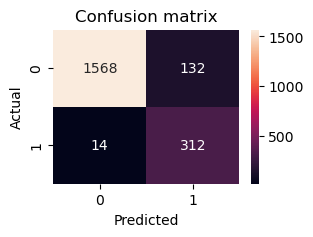

In [60]:
xgb_bf.fit(x_train, y_train)
get_classification_report(actuals=y_val, predictions=xgb_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       1.00      0.57      0.73      1700
           1       0.31      1.00      0.47       326

    accuracy                           0.64      2026
   macro avg       0.65      0.79      0.60      2026
weighted avg       0.89      0.64      0.69      2026



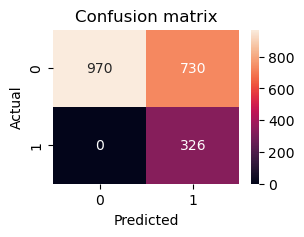

In [61]:
xgb_os_bf.fit(x_train_os, y_train_os)
get_classification_report(actuals=y_val, predictions=xgb_os_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      1700
           1       0.29      1.00      0.45       326

    accuracy                           0.60      2026
   macro avg       0.64      0.76      0.57      2026
weighted avg       0.89      0.60      0.65      2026



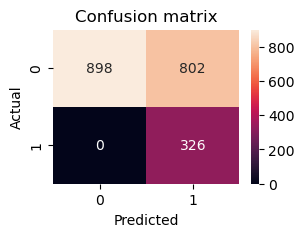

In [62]:
xgb_us_bf.fit(x_train_us, y_train_us)
get_classification_report(actuals=y_val, predictions=xgb_us_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1700
           1       0.93      0.88      0.90       326

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



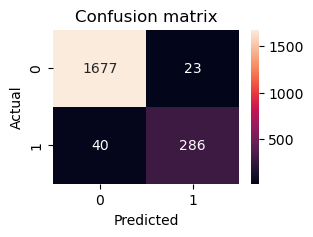

In [65]:
gb_bf.fit(x_train, y_train)
get_classification_report(actuals=y_val, predictions=gb_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1700
           1       0.89      0.91      0.90       326

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



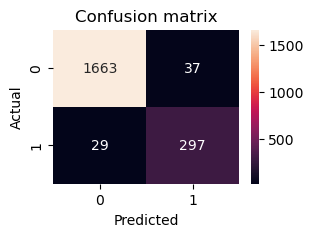

In [66]:
gb_os_bf.fit(x_train_os, y_train_os)
get_classification_report(actuals=y_val, predictions=gb_os_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1700
           1       0.78      0.96      0.86       326

    accuracy                           0.95      2026
   macro avg       0.88      0.96      0.91      2026
weighted avg       0.96      0.95      0.95      2026



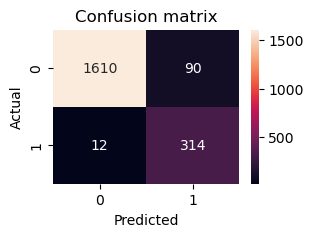

In [67]:
gb_us_bf.fit(x_train_us, y_train_us)
get_classification_report(actuals=y_val, predictions=gb_us_bf.predict(x_val), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1701
           1       0.68      0.97      0.80       325

    accuracy                           0.92      2026
   macro avg       0.84      0.94      0.88      2026
weighted avg       0.94      0.92      0.93      2026



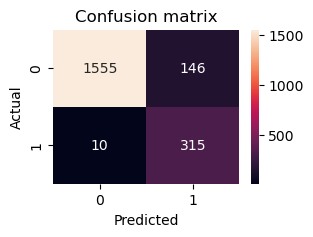

In [68]:
get_classification_report(actuals=y_test, predictions=xgb_bf.predict(x_test), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      1701
           1       0.30      1.00      0.46       325

    accuracy                           0.62      2026
   macro avg       0.65      0.77      0.58      2026
weighted avg       0.89      0.62      0.67      2026



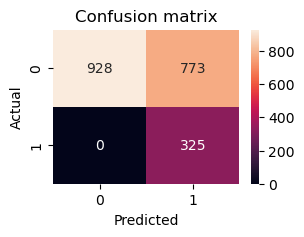

In [69]:
get_classification_report(actuals=y_test, predictions=xgb_os_bf.predict(x_test), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      1701
           1       0.28      1.00      0.43       325

    accuracy                           0.58      2026
   macro avg       0.64      0.75      0.55      2026
weighted avg       0.88      0.58      0.63      2026



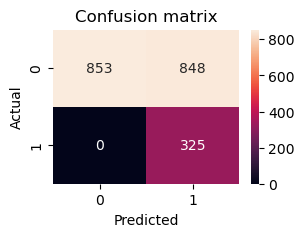

In [70]:
get_classification_report(actuals=y_test, predictions=xgb_us_bf.predict(x_test), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1701
           1       0.93      0.93      0.93       325

    accuracy                           0.98      2026
   macro avg       0.96      0.96      0.96      2026
weighted avg       0.98      0.98      0.98      2026



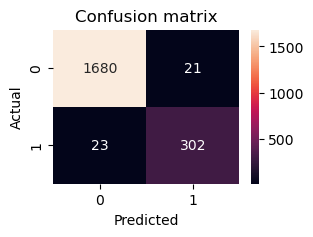

In [71]:
get_classification_report(actuals=y_test, predictions=gb_bf.predict(x_test), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1701
           1       0.88      0.94      0.91       325

    accuracy                           0.97      2026
   macro avg       0.94      0.96      0.95      2026
weighted avg       0.97      0.97      0.97      2026



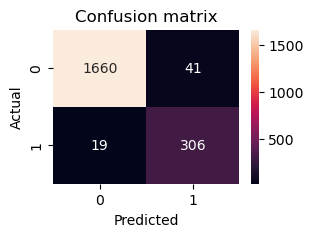

In [72]:
get_classification_report(actuals=y_test, predictions=gb_os_bf.predict(x_test), labels=Y.unique())

Classification report
``````````````````````````````````````````````````
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1701
           1       0.77      0.97      0.86       325

    accuracy                           0.95      2026
   macro avg       0.88      0.96      0.91      2026
weighted avg       0.96      0.95      0.95      2026



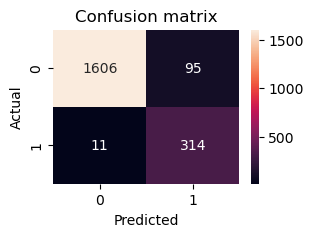

In [73]:
get_classification_report(actuals=y_test, predictions=gb_us_bf.predict(x_test), labels=Y.unique())